## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [3]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [16]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [17]:
# 資料前處理 - 標準化
x_train = x_train/255.
x_test = x_test/255.

In [18]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [19]:
# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1)) # reshape中的(n, -1)表示我要轉換成n個列，行數由剩下的維度決定，這裡是32*32*3行
x_test = x_test.reshape((len(x_test), -1))

In [20]:
x_train.shape, x_test.shape

((50000, 3072), (10000, 3072))

In [21]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [22]:
# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [23]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [25]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]]) #3072
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [30]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [31]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train,
         epochs=500,
         batch_size=256,
         validation_data=(x_test, y_test),
         shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 37s 731us/step - loss: 1.7774 - accuracy: 0.3757 - val_loss: 1.7690 - val_accuracy: 0.3819
Epoch 2/500
50000/50000 [==============================] - 36s 714us/step - loss: 1.7679 - accuracy: 0.3792 - val_loss: 1.7643 - val_accuracy: 0.3823
Epoch 3/500
50000/50000 [==============================] - 36s 717us/step - loss: 1.7630 - accuracy: 0.3810 - val_loss: 1.7613 - val_accuracy: 0.3825
Epoch 4/500
50000/50000 [==============================] - 36s 716us/step - loss: 1.7594 - accuracy: 0.3814 - val_loss: 1.7571 - val_accuracy: 0.3853
Epoch 5/500
50000/50000 [==============================] - 37s 731us/step - loss: 1.7561 - accuracy: 0.3823 - val_loss: 1.7548 - val_accuracy: 0.3837
Epoch 6/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.7531 - accuracy: 0.3829 - val_loss: 1.7519 - val_accuracy: 0.3862
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 36s 720us/step - loss: 1.6768 - accuracy: 0.4069 - val_loss: 1.6788 - val_accuracy: 0.4075
Epoch 56/500
50000/50000 [==============================] - 36s 723us/step - loss: 1.6756 - accuracy: 0.4078 - val_loss: 1.6782 - val_accuracy: 0.4083
Epoch 57/500
50000/50000 [==============================] - 36s 727us/step - loss: 1.6744 - accuracy: 0.4085 - val_loss: 1.6767 - val_accuracy: 0.4099
Epoch 58/500
50000/50000 [==============================] - 36s 714us/step - loss: 1.6733 - accuracy: 0.4091 - val_loss: 1.6756 - val_accuracy: 0.4099
Epoch 59/500
50000/50000 [==============================] - 36s 715us/step - loss: 1.6722 - accuracy: 0.4092 - val_loss: 1.6748 - val_accuracy: 0.4106
Epoch 60/500
50000/50000 [==============================] - 37s 741us/step - loss: 1.6710 - accuracy: 0.4098 - val_loss: 1.6738 - val_accuracy: 0.4090
Epoch 61/500
50000/50000 [==============================] - 36s 727us/step - loss: 1.6699 - ac

50000/50000 [==============================] - 36s 723us/step - loss: 1.6223 - accuracy: 0.4277 - val_loss: 1.6293 - val_accuracy: 0.4259
Epoch 110/500
50000/50000 [==============================] - 36s 721us/step - loss: 1.6215 - accuracy: 0.4272 - val_loss: 1.6283 - val_accuracy: 0.4260
Epoch 111/500
50000/50000 [==============================] - 36s 721us/step - loss: 1.6206 - accuracy: 0.4279 - val_loss: 1.6268 - val_accuracy: 0.4262
Epoch 112/500
50000/50000 [==============================] - 35s 710us/step - loss: 1.6197 - accuracy: 0.4281 - val_loss: 1.6275 - val_accuracy: 0.4255
Epoch 113/500
50000/50000 [==============================] - 36s 722us/step - loss: 1.6188 - accuracy: 0.4278 - val_loss: 1.6254 - val_accuracy: 0.4274
Epoch 114/500
50000/50000 [==============================] - 36s 715us/step - loss: 1.6180 - accuracy: 0.4283 - val_loss: 1.6257 - val_accuracy: 0.4281
Epoch 115/500
50000/50000 [==============================] - 36s 717us/step - loss: 1.6171 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 36s 720us/step - loss: 1.5774 - accuracy: 0.4440 - val_loss: 1.5895 - val_accuracy: 0.4371
Epoch 164/500
50000/50000 [==============================] - 36s 728us/step - loss: 1.5767 - accuracy: 0.4439 - val_loss: 1.5909 - val_accuracy: 0.4372
Epoch 165/500
50000/50000 [==============================] - 36s 726us/step - loss: 1.5760 - accuracy: 0.4439 - val_loss: 1.5870 - val_accuracy: 0.4385
Epoch 166/500
50000/50000 [==============================] - 36s 724us/step - loss: 1.5753 - accuracy: 0.4442 - val_loss: 1.5864 - val_accuracy: 0.4394
Epoch 167/500
50000/50000 [==============================] - 37s 739us/step - loss: 1.5744 - accuracy: 0.4450 - val_loss: 1.5853 - val_accuracy: 0.4377
Epoch 168/500
50000/50000 [==============================] - 36s 716us/step - loss: 1.5735 - accuracy: 0.4452 - val_loss: 1.5856 - val_accuracy: 0.4399
Epoch 169/500
50000/50000 [==============================] - 38s 768us/step - loss: 1.57

Epoch 217/500
50000/50000 [==============================] - 36s 719us/step - loss: 1.5374 - accuracy: 0.4581 - val_loss: 1.5534 - val_accuracy: 0.4516
Epoch 218/500
50000/50000 [==============================] - 37s 738us/step - loss: 1.5367 - accuracy: 0.4581 - val_loss: 1.5539 - val_accuracy: 0.4515
Epoch 219/500
50000/50000 [==============================] - 36s 729us/step - loss: 1.5360 - accuracy: 0.4576 - val_loss: 1.5524 - val_accuracy: 0.4512
Epoch 220/500
50000/50000 [==============================] - 37s 742us/step - loss: 1.5352 - accuracy: 0.4591 - val_loss: 1.5519 - val_accuracy: 0.4528
Epoch 221/500
50000/50000 [==============================] - 36s 722us/step - loss: 1.5345 - accuracy: 0.4589 - val_loss: 1.5508 - val_accuracy: 0.4517
Epoch 222/500
50000/50000 [==============================] - 37s 745us/step - loss: 1.5339 - accuracy: 0.4599 - val_loss: 1.5515 - val_accuracy: 0.4557
Epoch 223/500
50000/50000 [==============================] - 37s 737us/step - loss: 1.53

Epoch 271/500
50000/50000 [==============================] - 37s 748us/step - loss: 1.4999 - accuracy: 0.4729 - val_loss: 1.5245 - val_accuracy: 0.4637
Epoch 272/500
50000/50000 [==============================] - 35s 708us/step - loss: 1.4993 - accuracy: 0.4723 - val_loss: 1.5259 - val_accuracy: 0.4628
Epoch 273/500
50000/50000 [==============================] - 36s 724us/step - loss: 1.4987 - accuracy: 0.4716 - val_loss: 1.5204 - val_accuracy: 0.4646
Epoch 274/500
50000/50000 [==============================] - 37s 735us/step - loss: 1.4979 - accuracy: 0.4726 - val_loss: 1.5202 - val_accuracy: 0.4636
Epoch 275/500
50000/50000 [==============================] - 36s 718us/step - loss: 1.4974 - accuracy: 0.4728 - val_loss: 1.5229 - val_accuracy: 0.4615
Epoch 276/500
50000/50000 [==============================] - 36s 721us/step - loss: 1.4967 - accuracy: 0.4735 - val_loss: 1.5196 - val_accuracy: 0.4653
Epoch 277/500
50000/50000 [==============================] - 35s 706us/step - loss: 1.49

Epoch 325/500
50000/50000 [==============================] - 36s 719us/step - loss: 1.4646 - accuracy: 0.4838 - val_loss: 1.4959 - val_accuracy: 0.4725
Epoch 326/500
50000/50000 [==============================] - 36s 712us/step - loss: 1.4642 - accuracy: 0.4850 - val_loss: 1.4938 - val_accuracy: 0.4724
Epoch 327/500
50000/50000 [==============================] - 36s 725us/step - loss: 1.4630 - accuracy: 0.4851 - val_loss: 1.4939 - val_accuracy: 0.4739
Epoch 328/500
50000/50000 [==============================] - 36s 727us/step - loss: 1.4626 - accuracy: 0.4850 - val_loss: 1.4952 - val_accuracy: 0.4708
Epoch 329/500
50000/50000 [==============================] - 36s 722us/step - loss: 1.4619 - accuracy: 0.4848 - val_loss: 1.4950 - val_accuracy: 0.4727
Epoch 330/500
50000/50000 [==============================] - 37s 740us/step - loss: 1.4613 - accuracy: 0.4860 - val_loss: 1.4930 - val_accuracy: 0.4738
Epoch 331/500
50000/50000 [==============================] - 37s 749us/step - loss: 1.46

Epoch 379/500
50000/50000 [==============================] - 35s 706us/step - loss: 1.4307 - accuracy: 0.4952 - val_loss: 1.4721 - val_accuracy: 0.4784
Epoch 380/500
50000/50000 [==============================] - 35s 697us/step - loss: 1.4300 - accuracy: 0.4957 - val_loss: 1.4704 - val_accuracy: 0.4791
Epoch 381/500
50000/50000 [==============================] - 36s 714us/step - loss: 1.4295 - accuracy: 0.4965 - val_loss: 1.4739 - val_accuracy: 0.4785
Epoch 382/500
50000/50000 [==============================] - 35s 692us/step - loss: 1.4288 - accuracy: 0.4970 - val_loss: 1.4721 - val_accuracy: 0.4818
Epoch 383/500
50000/50000 [==============================] - 35s 695us/step - loss: 1.4286 - accuracy: 0.4953 - val_loss: 1.4720 - val_accuracy: 0.4802
Epoch 384/500
50000/50000 [==============================] - 35s 710us/step - loss: 1.4278 - accuracy: 0.4971 - val_loss: 1.4674 - val_accuracy: 0.4816
Epoch 385/500
50000/50000 [==============================] - 35s 705us/step - loss: 1.42

50000/50000 [==============================] - 40s 802us/step - loss: 1.3998 - accuracy: 0.5066 - val_loss: 1.4491 - val_accuracy: 0.4874
Epoch 433/500
50000/50000 [==============================] - 37s 739us/step - loss: 1.3994 - accuracy: 0.5066 - val_loss: 1.4470 - val_accuracy: 0.4883
Epoch 434/500
50000/50000 [==============================] - 37s 741us/step - loss: 1.3985 - accuracy: 0.5074 - val_loss: 1.4482 - val_accuracy: 0.4909
Epoch 435/500
50000/50000 [==============================] - 37s 738us/step - loss: 1.3984 - accuracy: 0.5074 - val_loss: 1.4475 - val_accuracy: 0.4879
Epoch 436/500
50000/50000 [==============================] - 35s 709us/step - loss: 1.3977 - accuracy: 0.5085 - val_loss: 1.4517 - val_accuracy: 0.4867
Epoch 437/500
50000/50000 [==============================] - 35s 708us/step - loss: 1.3971 - accuracy: 0.5082 - val_loss: 1.4474 - val_accuracy: 0.4886
Epoch 438/500
50000/50000 [==============================] - 35s 690us/step - loss: 1.3962 - accuracy:

Epoch 486/500
50000/50000 [==============================] - 42s 836us/step - loss: 1.3702 - accuracy: 0.5185 - val_loss: 1.4301 - val_accuracy: 0.4937
Epoch 487/500
50000/50000 [==============================] - 35s 703us/step - loss: 1.3698 - accuracy: 0.5179 - val_loss: 1.4324 - val_accuracy: 0.4960
Epoch 488/500
50000/50000 [==============================] - 35s 699us/step - loss: 1.3692 - accuracy: 0.5180 - val_loss: 1.4321 - val_accuracy: 0.4951
Epoch 489/500
50000/50000 [==============================] - 36s 727us/step - loss: 1.3687 - accuracy: 0.5181 - val_loss: 1.4346 - val_accuracy: 0.4941
Epoch 490/500
50000/50000 [==============================] - 37s 731us/step - loss: 1.3679 - accuracy: 0.5197 - val_loss: 1.4299 - val_accuracy: 0.4960
Epoch 491/500
50000/50000 [==============================] - 40s 792us/step - loss: 1.3676 - accuracy: 0.5183 - val_loss: 1.4297 - val_accuracy: 0.4961
Epoch 492/500
50000/50000 [==============================] - 39s 775us/step - loss: 1.36

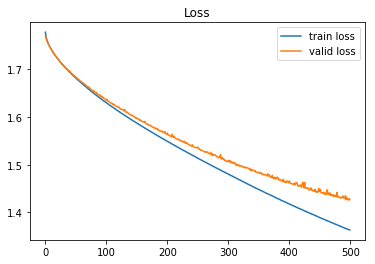

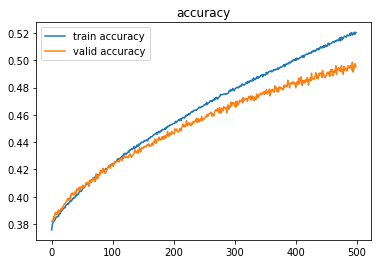

In [34]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_accuracy = model.history.history["accuracy"]
valid_accuracy = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_accuracy)), train_accuracy, label="train accuracy")
plt.plot(range(len(valid_accuracy)), valid_accuracy, label="valid accuracy")
plt.legend()
plt.title("accuracy")
plt.show()